✓ Imported ROCm ResNet18


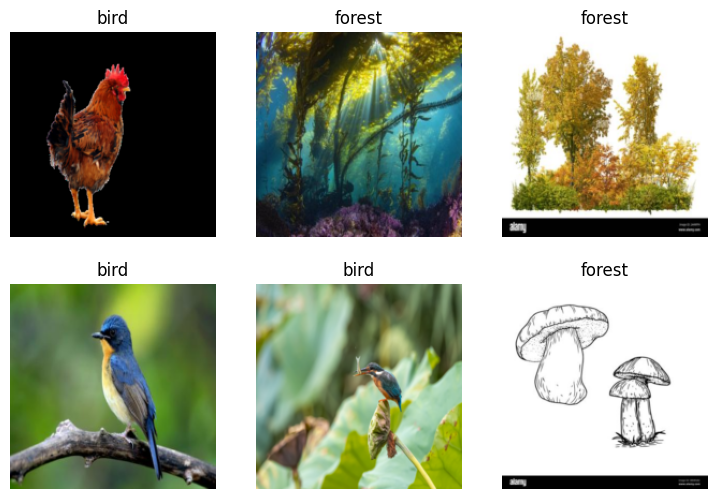

In [1]:
from fastcore.all import *
from fastai.vision.all import *
from fastprogress.fastprogress import force_console_behavior
from fastai.callback.progress import ProgressCallback
import fastai.callback.all
import fastprogress
import torch
import sys
sys.path.append('/workspace/notebooks/pylibs')
from rocm_resnet import rocm_resnet18
print("✓ Imported ROCm ResNet18")

path = Path('bird_or_not')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [2]:
# Create your learner wiht rocm_resnet18
learn = vision_learner(dls, rocm_resnet18, metrics=error_rate)
# Remove the problematic callback
learn.remove_cb(ProgressCallback)
learn.fine_tune(3)

Training from scratch...
[0, 1.2308032512664795, 1.018336534500122, 0.5428571701049805, '00:43']
[0, 0.8030117750167847, 0.5871232748031616, 0.3142857253551483, '02:11']
[1, 0.705872118473053, 0.850270688533783, 0.3142857253551483, '00:03']
[2, 0.6135317087173462, 0.7769995331764221, 0.3142857253551483, '00:03']


In [3]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.7538


In [4]:
is_bird,_,probs = learn.predict(PILImage.create('forest.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: forest.
Probability it's a bird: 0.0006
